In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

# change the default figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 16})

# Check how learning rate affect AWPINN and AWIPINN performance

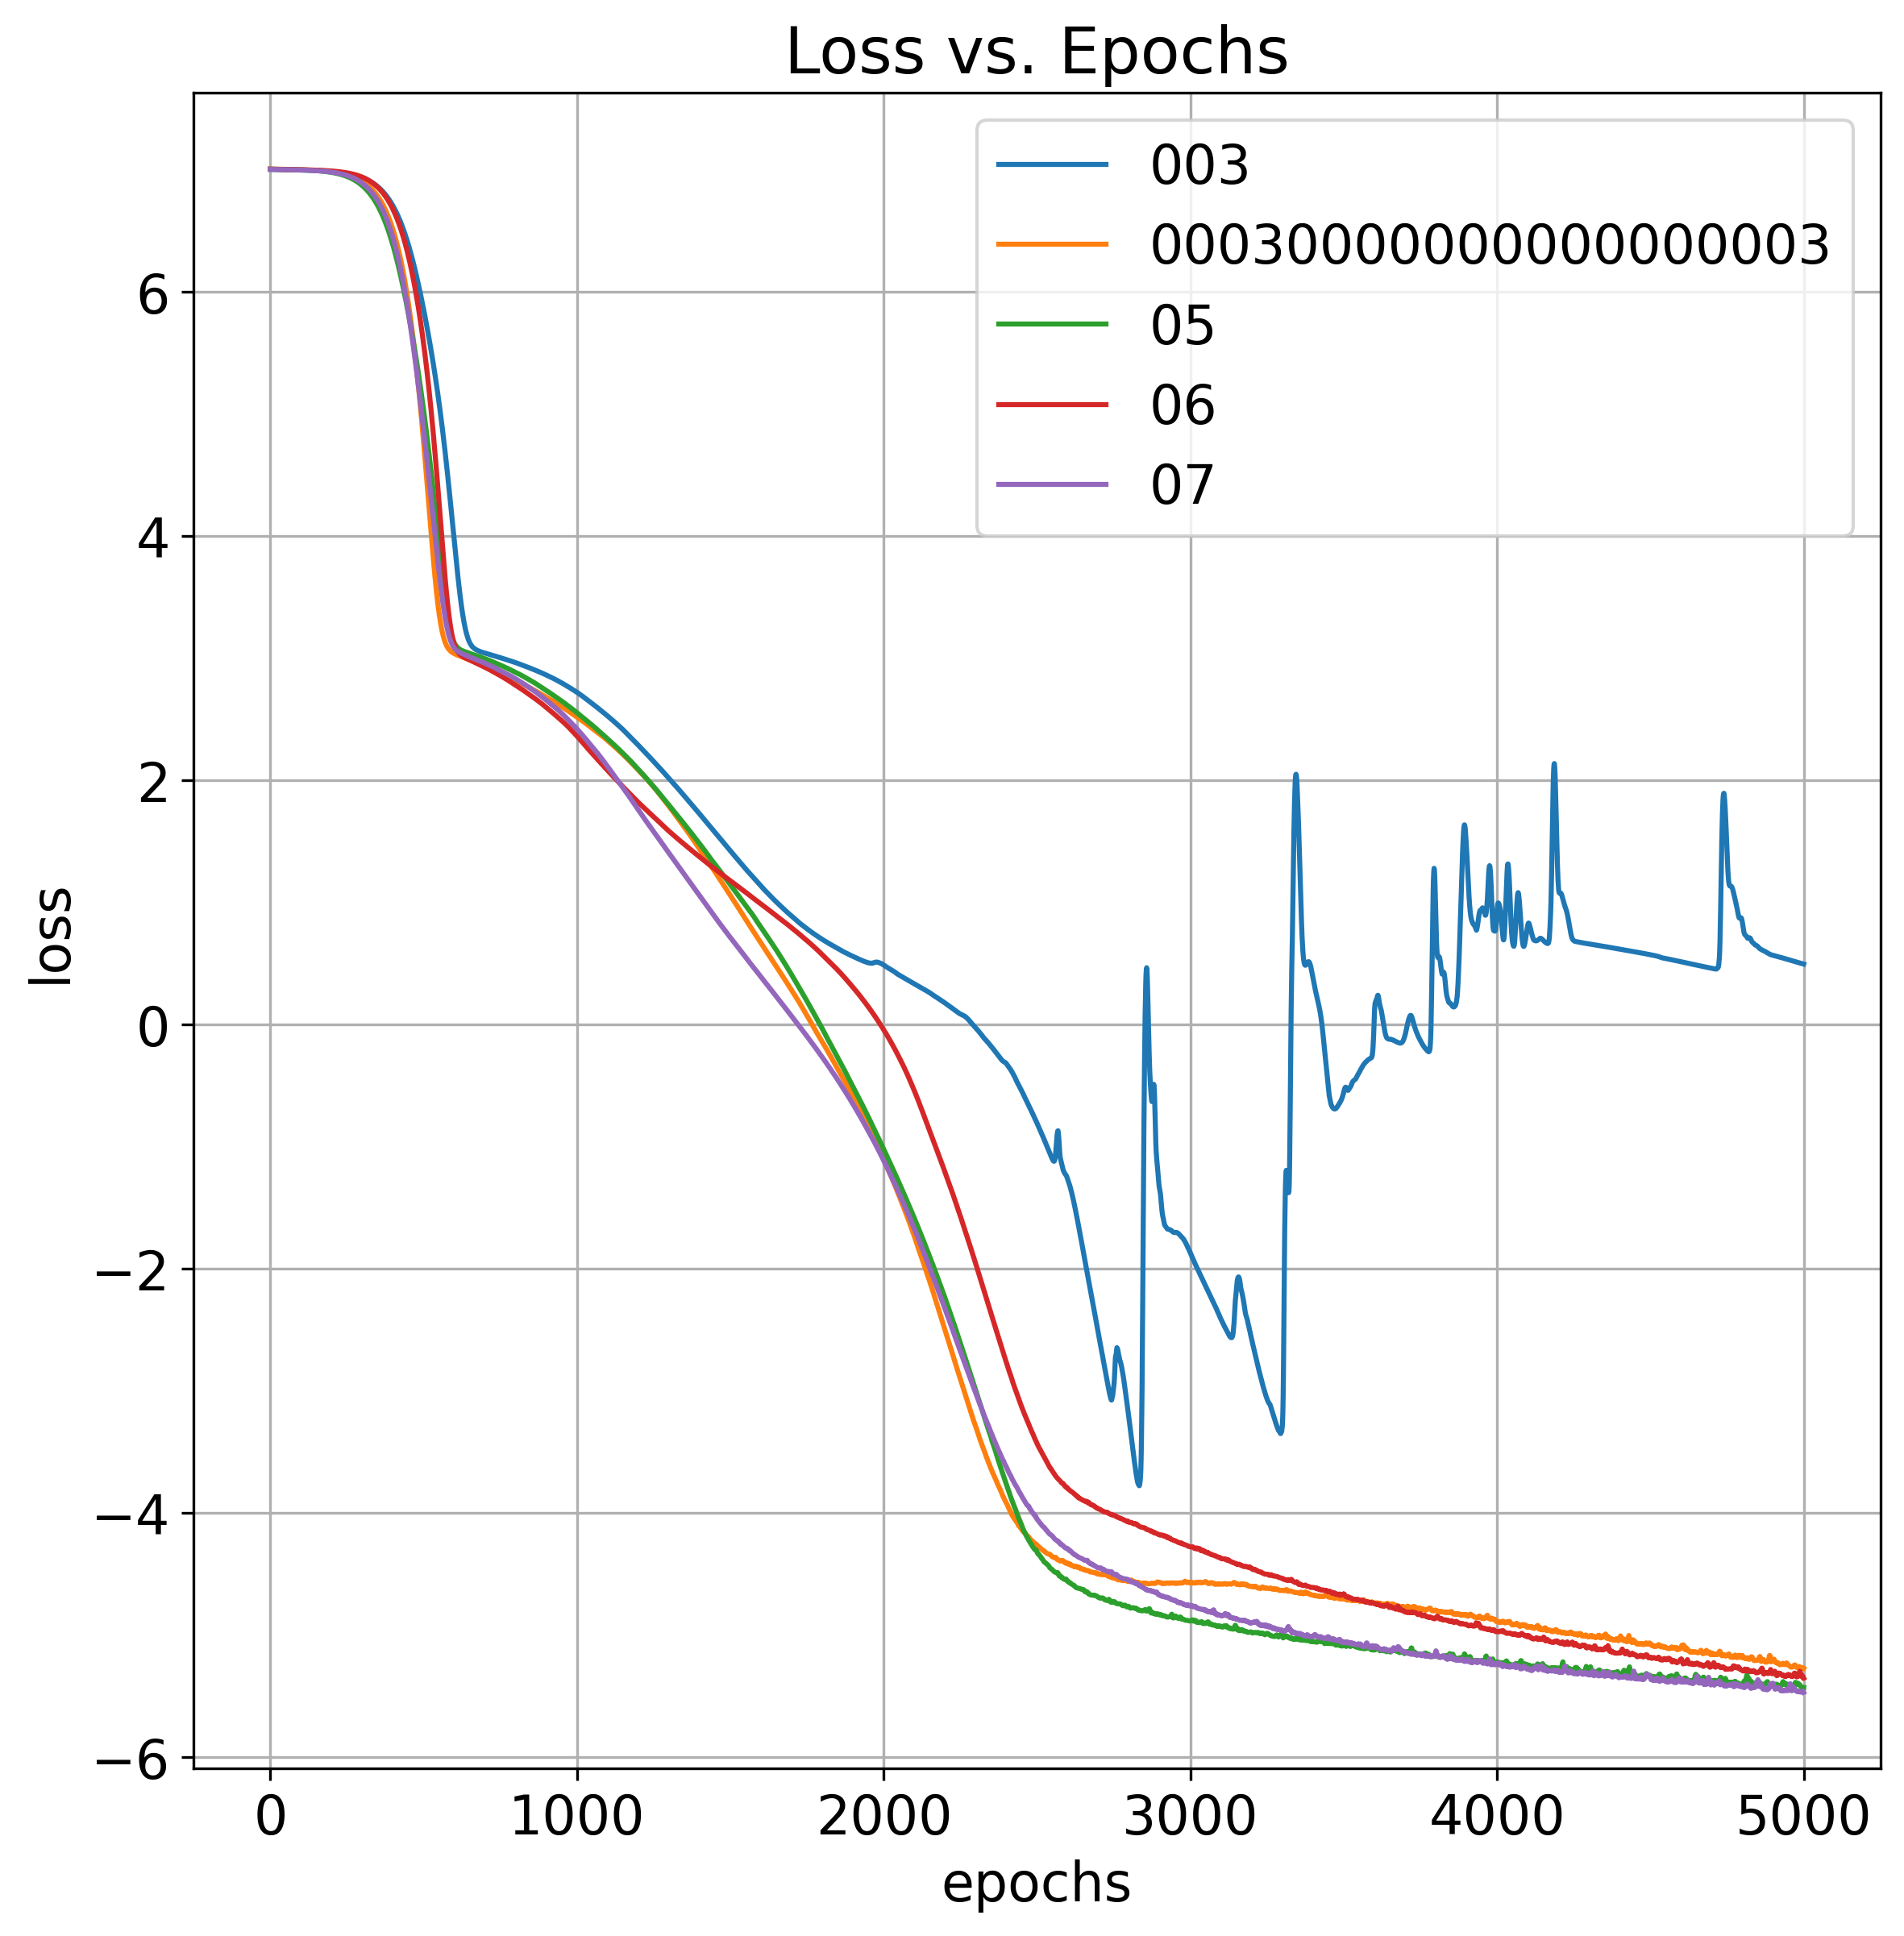

In [15]:
# extract data
loss_list = pd.read_csv('test_learning_rate/awpinn/0.003/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list2 = pd.read_csv('test_learning_rate/awpinn/0.00030000000000000003/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list3 = pd.read_csv('test_learning_rate/awpinn/3e-05/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list4 = pd.read_csv('test_learning_rate/awpinn/3e-06/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list5 = pd.read_csv('test_learning_rate/awpinn/3e-07/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list6 = pd.read_csv('test_learning_rate/awpinn/3e-09/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list7 = pd.read_csv('test_final_performance/pinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()

fig = plt.figure(figsize=(9,9))
plt.plot(range(5000), [np.log(item) for item in loss_list[:5000]], label='003')
plt.plot(range(5000), [np.log(item) for item in loss_list2[:5000]], label='00030000000000000003')
plt.plot(range(5000), [np.log(item) for item in loss_list3[:5000]], label='05')
plt.plot(range(5000), [np.log(item) for item in loss_list4[:5000]], label='06')
plt.plot(range(5000), [np.log(item) for item in loss_list5[:5000]], label='07')
# plt.plot(range(5000), [np.log(item) for item in loss_list6[:5000]], label='09')
# plt.plot(range(5000), [np.log(item) for item in loss_list7[:5000]], label='pinn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Loss vs. Epochs')
plt.grid(True)

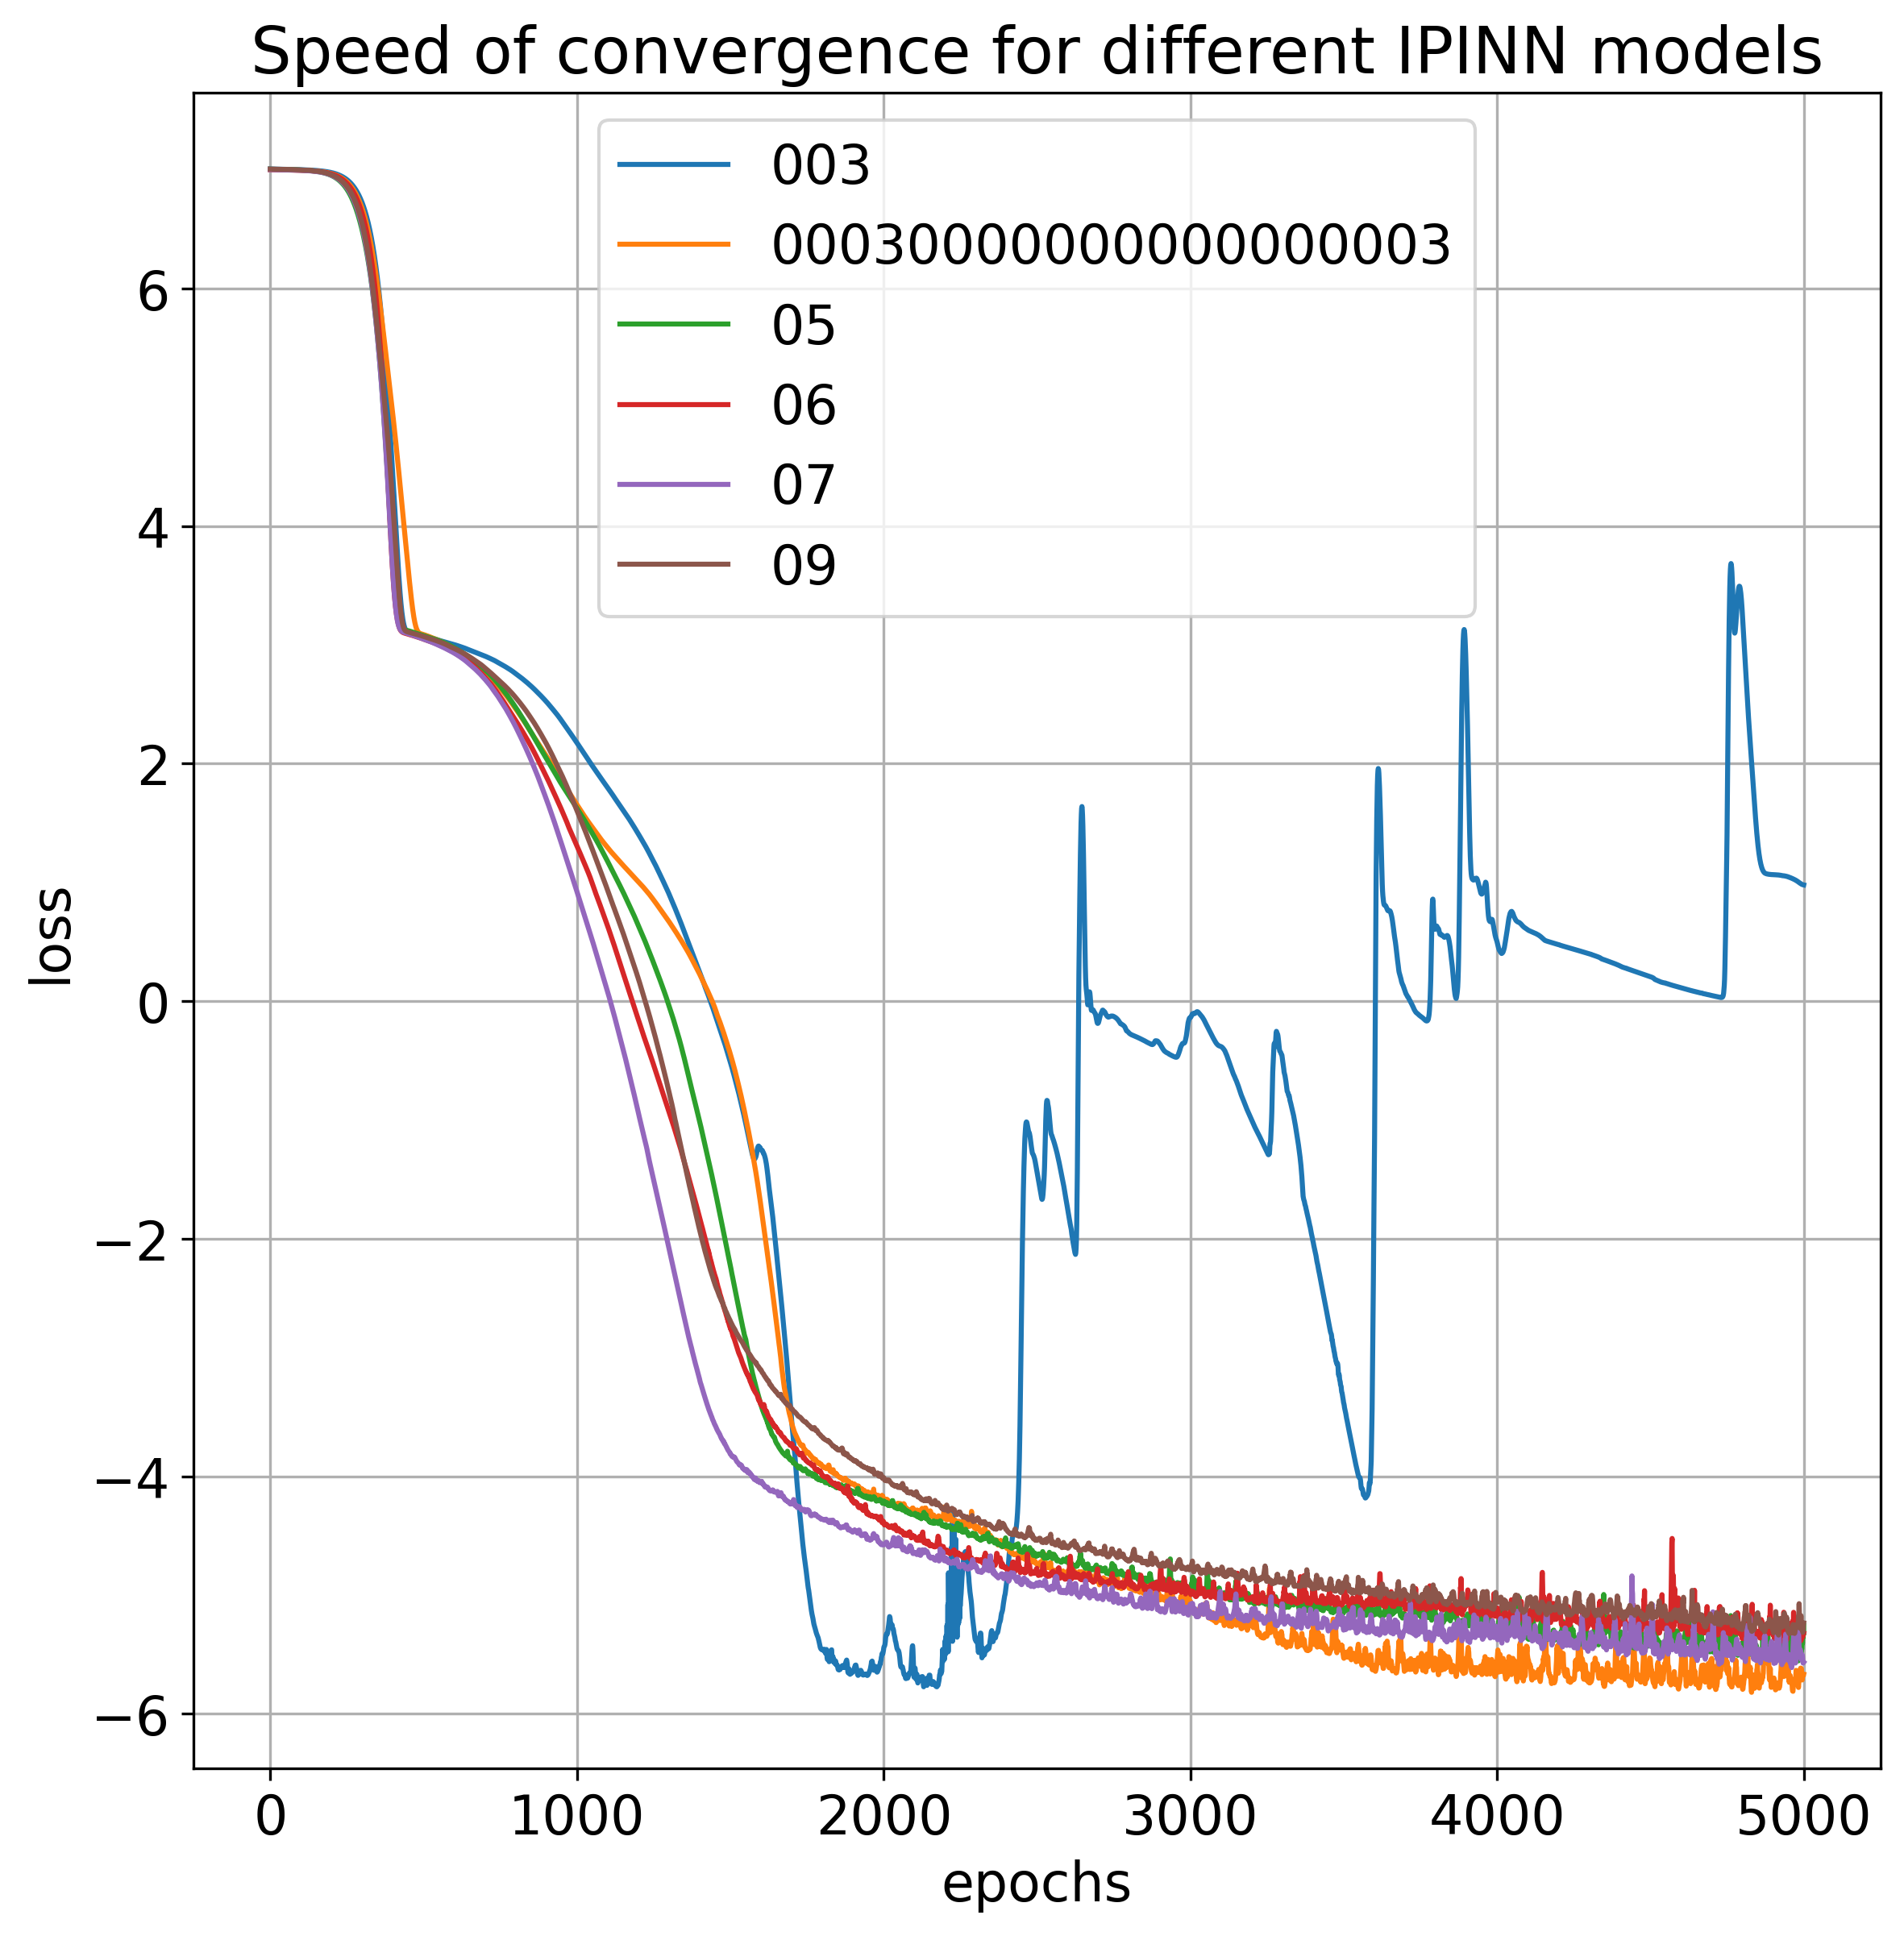

In [16]:
# extract data
loss_list = pd.read_csv('test_learning_rate/awipinn/0.003/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list2 = pd.read_csv('test_learning_rate/awipinn/0.00030000000000000003/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list3 = pd.read_csv('test_learning_rate/awipinn/3e-05/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list4 = pd.read_csv('test_learning_rate/awipinn/3e-06/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list5 = pd.read_csv('test_learning_rate/awipinn/3e-07/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list6 = pd.read_csv('test_learning_rate/awipinn/3e-09/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list7 = pd.read_csv('test_final_performance/ipinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list8 = pd.read_csv('test_final_performance/ipinn/ipinn_average_lossv1.csv')['Average_MSE_Loss'].to_numpy()
loss_list9 = pd.read_csv('test_final_performance/pinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()

fig = plt.figure(figsize=(9,9))
plt.plot(range(5000), [np.log(item) for item in loss_list[:5000]], label='003')
plt.plot(range(5000), [np.log(item) for item in loss_list2[:5000]], label='00030000000000000003')
plt.plot(range(5000), [np.log(item) for item in loss_list3[:5000]], label='05')
plt.plot(range(5000), [np.log(item) for item in loss_list4[:5000]], label='06')
plt.plot(range(5000), [np.log(item) for item in loss_list5[:5000]], label='07')
plt.plot(range(5000), [np.log(item) for item in loss_list6[:5000]], label='09')
# plt.plot(range(5000), [np.log(item) for item in loss_list7[:5000]], label='ipinn')
# plt.plot(range(5000), [np.log(item) for item in loss_list8[:5000]], label='ipinn2')
# plt.plot(range(5000), [np.log(item) for item in loss_list9[:5000]], label='pinn2')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different IPINN models')
plt.grid(True)
# plt.savefig('test_learning_rate/plot/PINN Training Losses for Different Weight Combinations.png', bbox_inches='tight')